In [ ]:
import numpy as np
import pandas as pd

In [ ]:
document = ["This is the most beautiful place in the world.", "This man has more skills to show in cricket than any other game.", "Hi there! how was your ladakh trip last month?", "There was a player who had scored 200+ runs in single cricket innings in his career.", "I have got the opportunity to travel to Paris next year for my internship.", "May be he is better than you in batting but you are much better than him in bowling.", "That was really a great day for me when I was there at Lavasa for the whole night.", "That's exactly I wanted to become, a highest ratting batsmen ever with top scores.", "Does it really matter wether you go to Thailand or Goa, its just you have spend your holidays.", "Why don't you go to Switzerland next year for your 25th Wedding anniversary?", "Travel is fatal to prejudice, bigotry, and narrow mindedness., and many of our people need it sorely on these accounts.", "Stop worrying about the potholes in the road and enjoy the journey.", "No cricket team in the world depends on one or two players. The team always plays to win.", "Cricket is a team game. If you want fame for yourself, go play an individual game.", "Because in the end, you won't remember the time you spent working in the office or mowing your lawn. Climb that goddamn mountain.", "Isn't cricket supposed to be a team sport? I feel people should decide first whether cricket is a team game or an individual sport."]

In [ ]:
document

['This is the most beautiful place in the world.',
 'This man has more skills to show in cricket than any other game.',
 'Hi there! how was your ladakh trip last month?',
 'There was a player who had scored 200+ runs in single cricket innings in his career.',
 'I have got the opportunity to travel to Paris next year for my internship.',
 'May be he is better than you in batting but you are much better than him in bowling.',
 'That was really a great day for me when I was there at Lavasa for the whole night.',
 "That's exactly I wanted to become, a highest ratting batsmen ever with top scores.",
 'Does it really matter wether you go to Thailand or Goa, its just you have spend your holidays.',
 "Why don't you go to Switzerland next year for your 25th Wedding anniversary?",
 'Travel is fatal to prejudice, bigotry, and narrow mindedness., and many of our people need it sorely on these accounts.',
 'Stop worrying about the potholes in the road and enjoy the journey.',
 'No cricket team in t

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(document)

In [ ]:
X

<16x92 sparse matrix of type '<class 'numpy.float64'>'
	with 106 stored elements in Compressed Sparse Row format>

In [ ]:
print(X)

  (0, 89)	0.5243543822136046
  (0, 54)	0.6021015204487483
  (0, 6)	0.6021015204487483
  (1, 24)	0.44767804583354776
  (1, 12)	0.3734958483364618
  (1, 69)	0.5744933500720799
  (1, 41)	0.5744933500720799
  (2, 44)	0.5
  (2, 81)	0.5
  (2, 38)	0.5
  (2, 29)	0.5
  (3, 10)	0.36704551360793053
  (3, 33)	0.36704551360793053
  (3, 68)	0.36704551360793053
  (3, 65)	0.36704551360793053
  (3, 0)	0.36704551360793053
  (3, 66)	0.36704551360793053
  (3, 56)	0.36704551360793053
  (3, 12)	0.23862761068667918
  (4, 34)	0.4257500680720407
  (4, 91)	0.37077453940812266
  (4, 52)	0.4257500680720407
  (4, 80)	0.37077453940812266
  (4, 51)	0.4257500680720407
  (4, 27)	0.4257500680720407
  :	:
  (13, 77)	0.290063728017694
  (13, 24)	0.580127456035388
  (13, 12)	0.2419989078666739
  (14, 45)	0.28867513459481287
  (14, 26)	0.28867513459481287
  (14, 11)	0.28867513459481287
  (14, 40)	0.28867513459481287
  (14, 46)	0.28867513459481287
  (14, 50)	0.28867513459481287
  (14, 88)	0.28867513459481287
  (14, 72)	0.28

In [ ]:
print(X.toarray())

[[0.         0.         0.         ... 0.52435438 0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [ ]:
from sklearn.cluster import KMeans


Finding the value to 'k'

In [ ]:
wcss = []

for i in range(1,11):
    km = KMeans(n_clusters=i)#may be used with init, max_iter etc.
    km.fit_predict(X)
    wcss.append(km.inertia_)#WithinClusterSumSquare and same as RSS

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
wcss

[14.6918649870554,
 13.184065041872746,
 12.060065509035613,
 11.01495809073933,
 9.936460646780278,
 8.926847669330716,
 7.911534285197787,
 6.926847669330715,
 5.911534285197787,
 4.911534285197787]

In [ ]:
import matplotlib.pyplot as plt

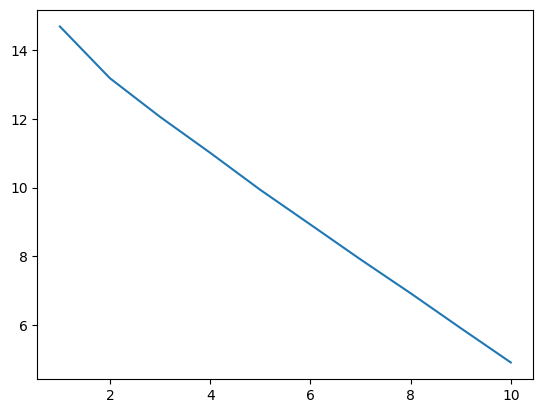

In [ ]:
plt.plot(range(1,11),wcss)

In [ ]:
km = KMeans(n_clusters=2)
y_means = km.fit_predict(X)

In [ ]:
y_means

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1], dtype=int32)

In [ ]:
#labeln = [1,0,1,0,1,0,1,0,1,1,1,1,0,0,1,0] and 1 is travel 0 is cricket

In [ ]:
print("Prediction")
X = vectorizer.transform(["Nothing is easy in cricket. Maybe when you watch it on TV, it looks easy. But it is not. You have to use your brain and time the ball."])
predicted = km.predict(X)
print(predicted)

Prediction
[1]


To find the words in clusters


In [ ]:
terms

array(['200', '25th', 'accounts', 'anniversary', 'batsmen', 'batting',
       'beautiful', 'better', 'bigotry', 'bowling', 'career', 'climb',
       'cricket', 'day', 'decide', 'depends', 'does', 'don', 'end',
       'enjoy', 'exactly', 'fame', 'fatal', 'feel', 'game', 'goa',
       'goddamn', 'got', 'great', 'hi', 'highest', 'holidays',
       'individual', 'innings', 'internship', 'isn', 'journey', 'just',
       'ladakh', 'lavasa', 'lawn', 'man', 'matter', 'mindedness', 'month',
       'mountain', 'mowing', 'narrow', 'need', 'night', 'office',
       'opportunity', 'paris', 'people', 'place', 'play', 'player',
       'players', 'plays', 'potholes', 'prejudice', 'ratting', 'really',
       'remember', 'road', 'runs', 'scored', 'scores', 'single', 'skills',
       'sorely', 'spend', 'spent', 'sport', 'stop', 'supposed',
       'switzerland', 'team', 'thailand', 'time', 'travel', 'trip',
       'want', 'wanted', 'wedding', 'wether', 'win', 'won', 'working',
       'world', 'worrying', 

In [ ]:
order = km.cluster_centers_.argsort()[:, ::-1]

In [ ]:
order

array([[ 7, 91, 62, 80, 54,  6, 89, 81, 29, 38, 44, 39, 13, 28, 49, 34,
        27, 51, 52, 84, 76,  1,  3, 17, 61, 36, 20, 19, 59, 90, 30, 74,
        83, 64,  4, 67,  5,  9, 37, 42, 31, 25, 16, 71, 78, 85, 48, 47,
        22, 60, 43, 70,  8,  2, 26, 11, 18, 45, 88, 40, 87, 46, 50, 79,
        63, 72, 53, 33, 73, 69, 10, 82, 75, 77, 68, 86, 12, 66, 14, 15,
        32, 65, 58, 57, 21, 56, 23, 24, 55, 41, 35,  0],
       [12, 77, 24, 41, 69, 32, 73, 21, 82, 55, 65, 66, 68, 10,  0, 56,
        33, 57, 58, 15, 86, 89, 14, 75, 35, 23, 53, 31, 26, 30, 34, 25,
        22, 29, 27, 28, 16, 20,  7,  1,  2,  3,  4,  5,  6,  8, 19,  9,
        11, 13, 37, 17, 18, 36, 91, 38, 63, 67, 70, 71, 72, 74, 76, 78,
        79, 80, 81, 83, 84, 85, 87, 88, 64, 62, 39, 61, 40, 42, 43, 44,
        90, 46, 47, 48, 49, 50, 51, 52, 54, 59, 60, 45]])

In [ ]:
terms[80]

'travel'

In [ ]:
for i in range(2):
  print("Cluster %d:" % i)
  for ind in order[i, :10]:
    print('%s ' % terms[ind])

Cluster 0:
better 
year 
really 
travel 
place 
beautiful 
world 
trip 
hi 
ladakh 
Cluster 1:
cricket 
team 
game 
man 
skills 
individual 
sport 
fame 
want 
play 
